<a href="https://colab.research.google.com/github/DajanaIsaku/PPPO_DetekcijaObjekata/blob/main/ProjekatDetekcijaObjekata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projektni zadatak iz predmeta principi prezentacije i prepoznavanja oblika**

**Student: Dajana Isaku IT 27/2020**

**Tema projektnog zadatka: Detekcija objekata (broda)**

**Mašinsko učenje**  

Mašinsko učenje (Machine learning) predstavlja vrstu veštačke inteligencije (AI) fokusiranu na razvoj računarskih sistema koji uče iz podataka. Širok spektar tehnika koje obuhvata mašinsko učenje omogućava softverskim aplikacijama da poboljšaju svoje performanse tokom vremena.

Mašinsko učenje se zasniva na ideji da postoje generički algoritmi koji mogu pružiti značajne informacije o skupu podataka bez potrebe za specifičnim kodom napisanim za određeni problem. Umesto da korisnik piše kod, podaci se ubacuju u generički algoritam, a on samostalno razvija logiku na osnovu tih podataka.

Na primer, klasifikacioni algoritam je vrsta ovakvih algoritama koja može razvrstati podatke u različite grupe. Isti klasifikacioni algoritam koji se koristi za prepoznavanje rukom pisanih brojeva može se primeniti i za klasifikaciju e-pošte u "spam" i "nije spam", bez potrebe za izmenom koda. To je isti algoritam, ali sa različitim setom trening podataka, te stoga razvija različitu logiku za klasifikaciju.

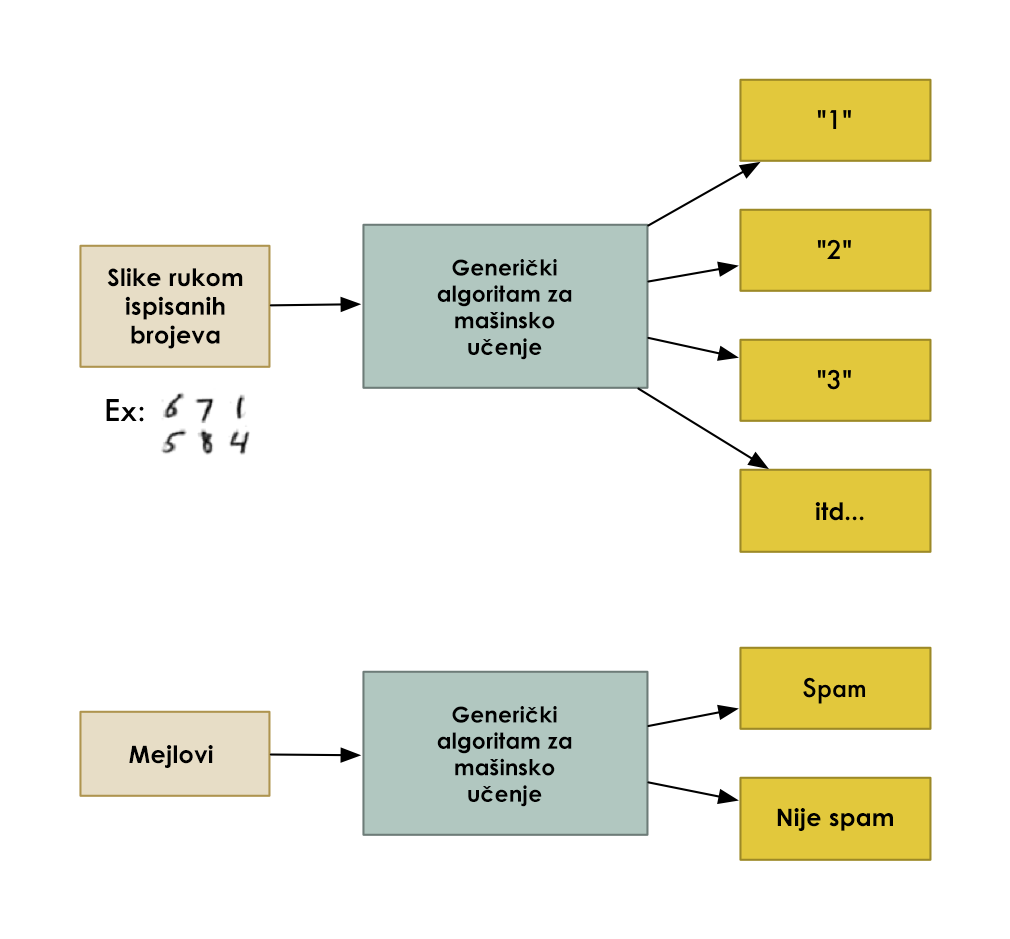

Nadgledano učenje i nenadgledano učenje predstavljaju dva osnovna pristupa u mašinskom učenju, a svaki ima svoje specifičnosti u pogledu postupaka obuke i vrsta problema koje mogu rešavati.

1. **Nadgledano učenje:**
   Nadgledano učenje je vrsta mašinskog učenja gde model uči na osnovu označenih podataka, što znači da su ulazni podaci upareni sa odgovarajućim izlaznim oznakama. Model analizira ulazne podatke i pokušava naučiti mapiranje između ulaznih i izlaznih podataka. Tokom obuke, algoritam optimizuje parametre modela kako bi minimizovao razliku između stvarnih i predviđenih vrednosti.
   - **Primeri:** Klasifikacija (npr. prepoznavanje slika, gde je svaka slika označena određenom klasom) i regresija (npr. predviđanje cena nekretnina na osnovu različitih karakteristika).

2. **Nenadgledano učenje:**
   Nenadgledano učenje je pristup gde model uči na osnovu neprocesuiranih, neoznačenih podataka. Ovde, algoritam pokušava otkriti obrasce ili strukturu unutar podataka bez prethodnih informacija o izlaznim oznakama. Model se bavi samo ulaznim podacima i pokušava ih grupisati, redukovati dimenzionalnost ili na neki drugi način izvući korisne informacije iz samih podataka.
   - **Primeri:** Klasterovanje (grupisanje sličnih instanci zajedno), redukcija dimenzionalnosti (smanjenje broja karakteristika zadržavajući bitne informacije) i generativni zadaci (npr. generisanje novih podataka sličnih unapred dato podacima).

Kombinacija ovih pristupa, poznata kao polunadgledano učenje, takođe postoji i koristi se u različitim scenarijima. U polunadgledanom učenju, model se trenira na kombinaciji označenih i neoznačenih podataka kako bi se model usmeravao ka optimalnom ponašanju u određenoj sredini.

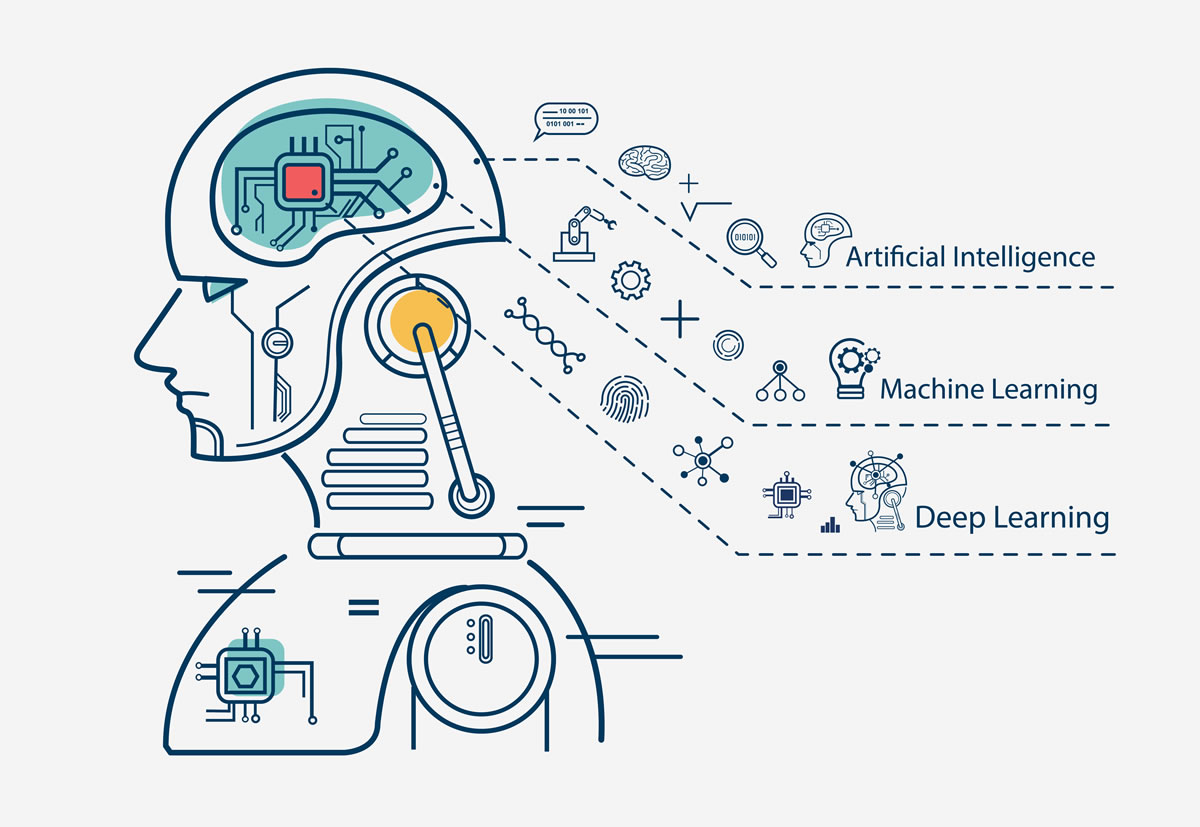




**Računarska vizija**

Računarska vizija predstavlja značajnu granu veštačke inteligencije (AI) koja omogućava računarima da izvlače suštinske informacije iz digitalnih slika, videa i drugih vizuelnih ulaza, dopuštajući im da preduzimaju određene radnje ili pružaju preporuke na osnovu tih informacija. Dok veštačka inteligencija daje računarima sposobnost razmišljanja, računarska vizija im omogućava sposobnost viđenja, posmatranja i razumevanja okoline.

Funkcionalnost računarske vizije paralelna je sa ljudskim vidom, iako ljudi imaju privilegiju konteksta koji im pomaže u razlikovanju objekata, proceni udaljenosti, prepoznavanju kretanja, kao i identifikaciji neobičnosti na slici.

Računarska vizija obučava mašine da izvršavaju ove funkcije, ali sa ključnom razlikom da to radi u znatno kraćem vremenskom periodu koristeći kamere, podatke i algoritme umesto fizičkih komponenti poput retine, optičkog nerva i vizuelnog korteksa. Ova tehnologija omogućava sistemu da pažljivo posmatra proizvode ili prati proizvodne resurse analizirajući hiljade proizvoda ili procesa u minutu. Na taj način, sistem može brže prepoznati neprimetne defekte ili probleme u odnosu na ljudske sposobnosti.

Primena računarske vizije u industriji je od suštinskog značaja, gde sistem može efikasno analizirati velike količine podataka i brzo identifikovati eventualne neregularnosti ili nepravilnosti. Ova tehnologija takođe ima potencijal da unapredi procese inspekcije proizvoda, čime se povećava preciznost i produktivnost u poređenju sa ručnim metodama.

Računarska vizija igra ključnu ulogu u evoluciji veštačke inteligencije, pružajući računarima sposobnost vizuelnog percepiranja i tumačenja okoline. Njena primena u industriji omogućava ubrzanje procesa analize i optimizaciju proizvodnih resursa, čime se postiže efikasnije poslovanje i unapređuje kvalitet proizvoda.

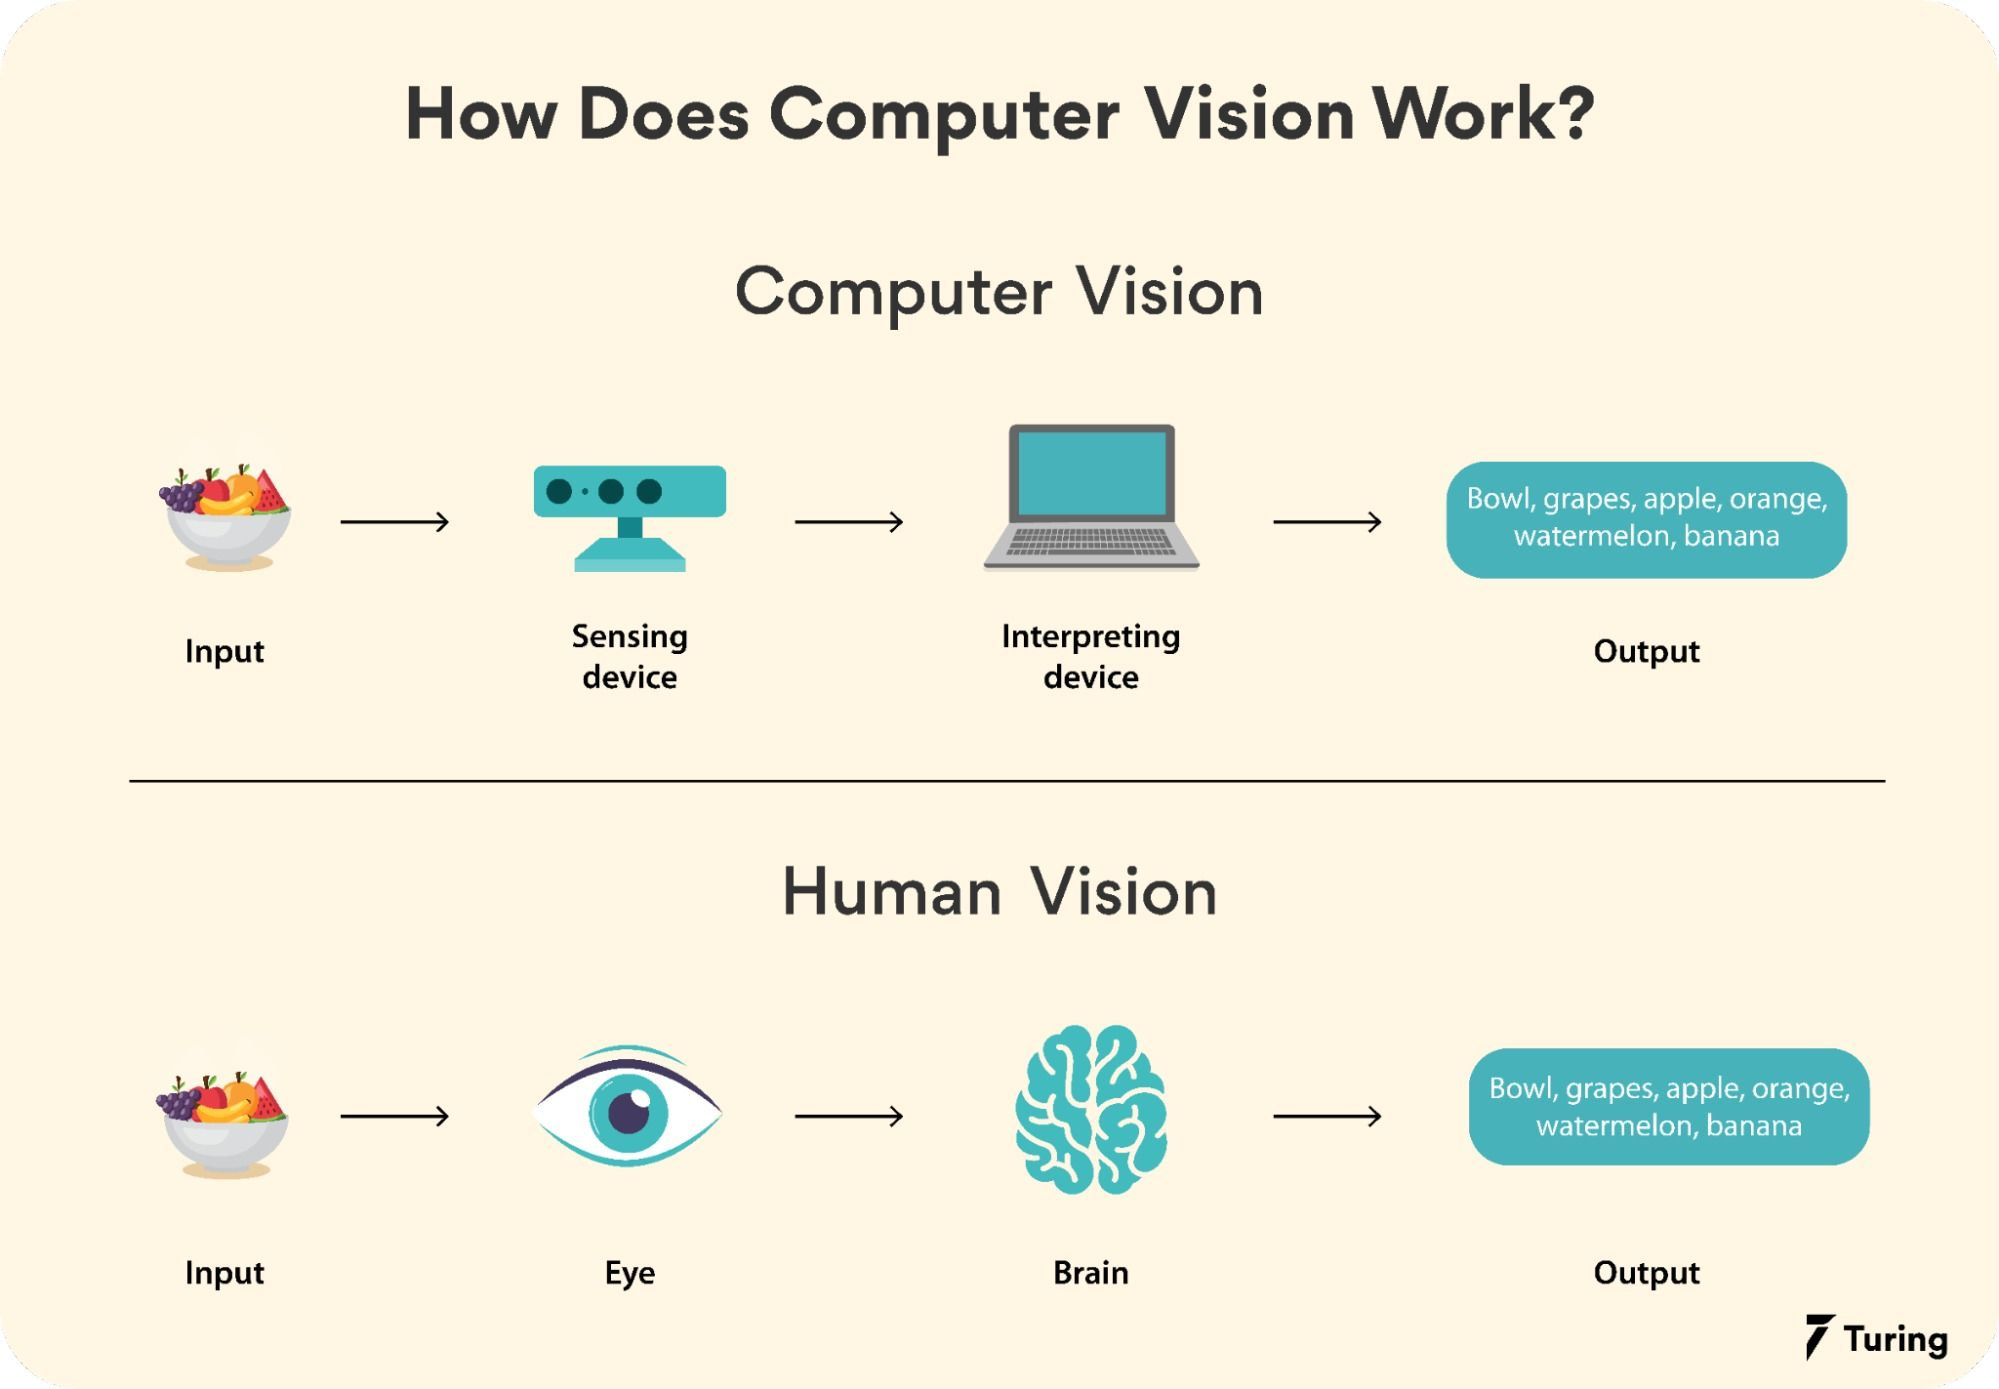



**Detekcija objekata**

Detekcija objekata predstavlja ključnu komponentu računarske vizije koja omogućava sistemima da automatski identifikuju, lokalizuju i klasifikuju objekte u digitalnim slikama ili video zapisima. Ova tehnologija ima široku primenu u različitim oblastima, uključujući autonomna vozila, video nadzor, medicinsku dijagnostiku, industrijsku automatizaciju i mnoge druge. Ovaj rad će istražiti različite pristupe detekciji objekata, kao i ključne tehnike koje se koriste u ovom domenu.

1. Osnovni koncepti detekcije objekata:
   Detekcija objekata se sastoji od dva osnovna koraka - lokalizacije i klasifikacije. Lokalizacija se odnosi na identifikaciju tačnog položaja objekta u slici, dok se klasifikacija bavi određivanjem vrste ili identiteta objekta. Ovi koraci čine osnovu za razvoj složenijih sistema detekcije objekata.

2. Tradicionalni pristupi:
   Tradicionalni pristupi detekciji objekata obično uključuju ručno projektovane karakteristike i algoritme, kao što su Haar kaskade ili Histogram orijentisanih gradijenata (HOG). Ovi pristupi su efikasni u određenim situacijama, ali često pokazuju ograničenja u složenijim scenarijima.

3. Konvolucione neuralne mreže (CNN):
   Sa razvojem dubokog učenja, konvolucione neuralne mreže su postale dominantna tehnologija u detekciji objekata. Modeli poput Faster R-CNN, YOLO (You Only Look Once) i SSD (Single Shot MultiBox Detector) su popularni zbog svoje sposobnosti da istovremeno izvrše lokalizaciju i klasifikaciju objekata sa visokim stepenom tačnosti.

4. Transferno učenje:
   Transferno učenje je takođe postao važan pristup u detekciji objekata, gde se prethodno obučeni modeli koriste kao osnova za treniranje novih modela specifičnih za određeni zadatak. Ova tehnika omogućava bolje performanse čak i kada je dostupan mali skup podataka za treniranje.

5. Detekcija objekata u realnom vremenu:
   Detekcija objekata u realnom vremenu postavlja dodatne izazove, uključujući brzinu i efikasnost. Pristupi poput MobileNet i EfficientDet su posebno prilagođeni za rad u resursno ograničenim okruženjima, čime omogućavaju brzu obradu slika ili videa u stvarnom vremenu.

Detekcija objekata u računarskoj viziji je oblast koja se neprestano razvija, a primena novih tehnologija kao što su duboko učenje i transferno učenje omogućava postizanje visokih performansi u različitim scenarijima. Raznolikost pristupa i tehnika omogućava inženjerima da prilagode detekciju objekata prema specifičnim zahtevima njihovih projekata. Ovaj rad pruža pregled ključnih aspekata detekcije objekata, ističući najnovije tehnologije koje se koriste u ovoj oblasti.


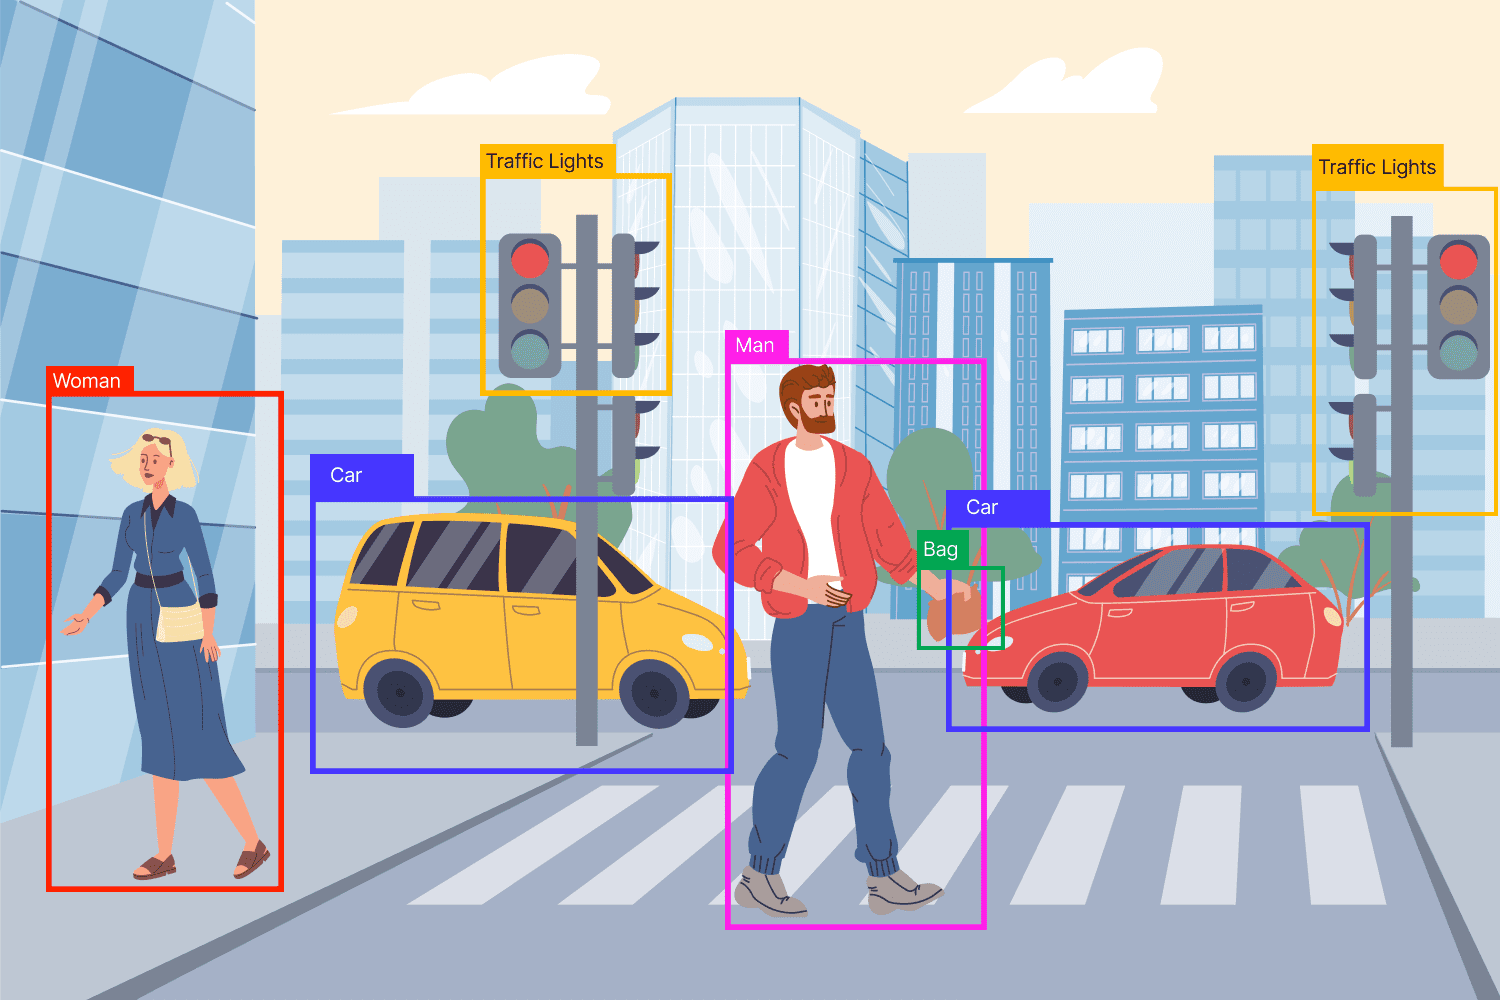

**Opis projektnog zadatka**


Cilj projekta je razviti model za detekciju i klasifikaciju brodova na fotografijama snimljenim iz ptičje perspektive. Glavni zadatak je predviđanje lokacije broda na svakoj slici, a ove informacije mogu doprineti praćenju brodova iz vazduha. Dataset koji će se koristiti za ovaj projekat sastoji se od slika koje su označene sa ili bez prisustva brodova, kao i sa jednim ili više brodova na slici, različito raspoređenih.

Dataset koji je korišćen u izradi ovog projektnog zadatka nalazi se na sledećoj lokaciji: https://drive.google.com/file/d/1VHbj77uYVjcEh9_e4Y6wgpIMI-8Q2YBo/view?usp=sharing.

Struktura dataset-a:

1. **train_v2 folder:** Ovaj folder sadrži slike koje će biti korišćene za treniranje modela. Ukupno, dataset ima 44,533 slike.

2. **test_v2 folder:** Sadrži slike koje će se koristiti za testiranje modela. Cilj je detektovati prisustvo brodova na ovim slikama. U ovom folderu se nalazi 6,872 slike.

3. **train_ship_segmentations_v2.csv:** CSV fajl koji sadrži podatke za obuku. Sastoji se od dve kolone: "ImageId" koja identifikuje jedinstveni ID slike, i "EncodedPixels" koja sadrži informacije o segmentaciji brodova.

4. **sample_submission_v2.csv:** Primer formata fajla koji se očekuje kao rešenje zadatka. Ovaj fajl služi kao referenca za format u kojem treba dostaviti predviđanja.

Realizacija zadatka zahteva razvoj modela za detekciju objekata na slikama, sa posebnim fokusom na brodove. Kao ulaz koristiće se slike iz train_v2 foldera, dok će se performanse modela evaluirati na test_v2 slikama. Rezultati će biti predstavljeni u formatu sličnom sample_submission_v2.csv.

Projekat ima praktičnu primenu u praćenju i analizi brodova iz vazduha, pružajući korisne informacije o njihovom položaju.

Na početku je potrebno da pristupimo Google Drive-u radi dalje analize podataka.

Ova linija koda uvozi biblioteku drive iz paketa google.colab. google.colab je paket koji se često koristi u Colab okruženju, koje je Google-ovo besplatno okruženje za izradu i deljenje Jupyter sveski.

Što se tiče drive biblioteke, ona pruža funkcionalnost za interakciju sa Google Drive-om unutar Colab okruženja. Konkretno, ova linija koda omogućava montiranje Google Drive-a na Colab virtuelnu mašinu. To znači da će  Google Drive biti dostupan kao skladišni prostor unutar Colab okruženja, a može se pristupiti datotekama na  Google Drive-u direktno iz Colab sveski.



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Koristim `pip` (Python paket menadžer) za instalaciju biblioteke `gdown` koju ću koristi za preuzimanje datoteka sa Google Drive-a direktno u Colab okruženju.

In [ ]:
!pip install gdown

**Implementacija pomoću MASK-RCNN-a**

Mask R-CNN (Mask Region-based Convolutional Neural Network) je arhitektura dubokog učenja koja se koristi za segmentaciju objekata u slikama. Mask R-CNN proširuje osnovni koncept Region-based CNN (R-CNN) dodajući sposobnost izdvajanja preciznih maski piksela za identifikovane objekte.

Ključne karakteristike Mask R-CNN-a su:

1. **Region Proposal Network (RPN):** Koristi se za predlaganje regija koje bi mogle sadržavati objekte. RPN radi na nivou regiona i generiše predloge za potencijalne objekte.

2. **Region-based CNN (RoI-CNN):** Nakon što su regije predložene, RoI-CNN se koristi za izdvajanje karakterističnih značajki iz svake regije. Ove značajke se zatim koriste za klasifikaciju objekata i regresiju za prilagođavanje granica objekta.

3. **Maskiranje (Masking):** Ovo je ključna inovacija u odnosu na osnovni R-CNN. Mask R-CNN dodaje još jedan sloj koji generiše binarne maske za svaki identifikovani objekat, označavajući piksele koji pripadaju tom objektu.

Mask R-CNN je efikasan za zadatke semantičke segmentacije, gdje je cilj dodeliti svakom pikselu na slici odgovarajuću klasu objekta, kao i instancu objekta, omogućavajući precizno razlikovanje između različitih instanci iste klase. Ova arhitektura je postala popularna u različitim oblastima, uključujući računarsku viziju i robotiku, zbog svoje sposobnosti tačne segmentacije objekata.



In [ ]:
import gdown

In [ ]:
import os
import sys
import random
import math
import warnings
import numpy as np
import cv2

In [ ]:
import matplotlib.pyplot as plt
import json
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd
import glob
import numpy as np
import pandas as pd
from skimage.io import imread

In [ ]:
from matplotlib.cm import get_cmap
from skimage.segmentation import mark_boundaries
from skimage.util import montage
from skimage.morphology import binary_opening, disk, label
import gc; gc.enable()

Preuzimanje već postojeće biblioteke Mask-RCNN koja predstavlja osnovu rešenja i koja će se dalje prilagođavati u zavisnosti od ovog konkretnog primera.

In [ ]:
!git clone https://github.com/maxw1489/Mask_RCNN.git
os.chdir('Mask_RCNN')

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
sys.path.append(os.path.join('Mask_RCNN'))

In [ ]:
from mrcnn.config import Config

In [ ]:
from mrcnn import utils

In [ ]:
import mrcnn.model as modellib

In [ ]:
from mrcnn import visualize

In [ ]:
from mrcnn.model import log

In [ ]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = "mask_rcnn_coco.h5"

-rw-r--r-- 1 root root 246M Dec  6  2021 mask_rcnn_coco.h5


Kako bi se omogućio rad sa podacima, sledi učitavanje seta podataka u svesku. Podaci se dele u dva foldera radi bolje preglednosti. Jedan folder će sadržati podatke za trening, a drugi folder podatke za testiranje.

In [ ]:
data_dir = '/content/drive/MyDrive/Ships_Detection'
main_dir = '/content/drive/MyDrive/'

In [ ]:
train_dir = os.path.join(data_dir, 'train_v2')
test_dir = os.path.join(data_dir, 'test_v2')

In [ ]:
import os

train_images = os.listdir(train_dir)
num_train_images = len(train_images)

test_images = os.listdir(test_dir)
num_test_images = len(test_images)

**Pregled seta podataka:**

In [ ]:
# slike za obuku
print(num_train_images)

# slike za testiranje
print(num_test_images)

33533
6882


In [ ]:
import pandas as pd
import os

In [ ]:
csv_file1 = os.path.join('/content/drive/MyDrive/Ships_Detection/', 'sample_submission_v2.csv')
csv_file2 = os.path.join('/content/drive/MyDrive/Ships_Detection/', 'train_ship_segmentations_v2.csv')

In [ ]:
df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)

# DataFrame

print("\nsample_submission_v2.csv:")
print(df1)

print("\ntrain_ship_segmentations_v2.csv:")
print(df2)


sample_submission_v2.csv:
             ImageId EncodedPixels
0      00002bd58.jpg           1 2
1      00015efb6.jpg           1 2
2      00023d5fc.jpg           1 2
3      000367c13.jpg           1 2
4      0008ca6e9.jpg           1 2
...              ...           ...
15601  ffdb3cda6.jpg           1 2
15602  ffe3857eb.jpg           1 2
15603  ffeb765e8.jpg           1 2
15604  ffeba1475.jpg           1 2
15605  fff0fd44f.jpg           1 2

[15606 rows x 2 columns]

train_ship_segmentations_v2.csv:
             ImageId                                      EncodedPixels
0      000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
1      000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
2      000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
3      000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
4      000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
...              ...                                         

In [ ]:
import pandas as pd

# Učitavanje CSV fajla sa podacima o treningu
train_csv = '/content/drive/MyDrive/Ships_Detection/train_ship_segmentations_v2.csv'
df_train = pd.read_csv(train_csv)

In [ ]:
# Raspodela klasa
class_counts = df_train['EncodedPixels'].notnull().value_counts()

print("Raspodela klasa:")
print(class_counts)

Raspodela klasa:
False    23396
True     12639
Name: EncodedPixels, dtype: int64


U ovom delu koda iz biblioteke PIL (Python Imaging Library) učitavaju se potrebne funkcije za rad sa slikama, a zatim se koristi biblioteka sklearn za podelu skupa podataka na trening i test skup. Definisan je niz "exclude_list" koji sadrži imena slika koje će biti isključene iz analize (oštećene slike). Nakon toga, funkcija "filter_file_names" filtrira imena slika u datoteci, isključujući one koje se nalaze u "exclude_list", i rezultati se čuvaju u promenljivim "train_names" i "test_names".

In [ ]:
from PIL import Image


In [ ]:

from sklearn.model_selection import train_test_split
exclude_list = ['6384c3e78.jpg','13703f040.jpg', '14715c06d.jpg',  '33e0ff2d5.jpg',
                '4d4e09f2a.jpg', '877691df8.jpg', '8b909bb20.jpg', 'a8d99130e.jpg',
                'ad55c3143.jpg', 'c8260c541.jpg', 'd6c7f17c7.jpg', 'dc3e7c901.jpg',
                'e44dffe88.jpg', 'ef87bad36.jpg', 'f083256d8.jpg'] #corrupted images

def filter_file_names(directory, exclude_list):
    file_names = []
    with os.scandir(directory) as entries:
        for entry in entries:
            if entry.is_file() and entry.name not in exclude_list:
                file_names.append(entry.name)
    return file_names

train_names = filter_file_names(train_dir, exclude_list)
test_names = filter_file_names(test_dir, exclude_list)

 Postavljanjem debug na `False`, program se obično izvršava bez dodatnih izlaznih informacija ili poruka za debagovanje, čime se može poboljšati preglednost.

In [ ]:
debug = False

Ovde se koristi biblioteka pandas (pd) za kreiranje DataFrame objekta koji sadrži kolonu "File Name" sa imenima slika iz trening i test skupa podataka. Nakon toga, ovi podaci se čuvaju u CSV fajlove na određenim lokacijama na drajvu (/content/drive/MyDrive/Ships_Detection/).

`train_names` se koristi za kreiranje DataFrame-a, a zatim se taj DataFrame čuva u CSV fajl pod nazivom "train_names.csv" na navedenoj putanji.

`test_names` se koristi na sličan način za kreiranje DataFrame-a, koji se zatim čuva u CSV fajl pod nazivom "test_names.csv" na određenoj putanji.

Ovi CSV fajlovi sadrže informacije o imenima slika iz trening i test skupa podataka, što će biti korisno za dalju analizu.

In [ ]:
df = pd.DataFrame({'File Name': train_names})
df.to_csv('/content/drive/MyDrive/Ships_Detection/train_names.csv', index=False)

In [ ]:
df = pd.DataFrame({'File Name': test_names})
df.to_csv('/content/drive/MyDrive/Ships_Detection/test_names.csv', index=False)

In [ ]:
print(train_names)

print(len(train_names), len(test_names))

['522ddf3dc.jpg', '52394a336.jpg', '523602e05.jpg', '522c8b060.jpg', '523be8565.jpg', '5230b6a28.jpg', '52317a68a.jpg', '523af81fa.jpg', '522b2a171.jpg', '522f3223b.jpg', '52385dcbc.jpg', '52372a950.jpg', '5240bd1a2.jpg', '5247dd6d3.jpg', '5241872da.jpg', '5243a5336.jpg', '524f26dc6.jpg', '5240bf0bd.jpg', '525136bab.jpg', '524342768.jpg', '524a5f12f.jpg', '5251dd701.jpg', '5248ee313.jpg', '5240e8463.jpg', '52467bd6c.jpg', '5242aacf6.jpg', '524d74f75.jpg', '524b30fcc.jpg', '52563e1f9.jpg', '524bc1b50.jpg', '5248a7ac7.jpg', '524821b75.jpg', '524729ebf.jpg', '524e1c5e0.jpg', '524a6f733.jpg', '524cffc50.jpg', '52531b6c9.jpg', '524fe24d6.jpg', '52554c148.jpg', '5241789ba.jpg', '52429d8f4.jpg', '525762217.jpg', '52448d074.jpg', '524736a65.jpg', '5251dca7f.jpg', '5251a816f.jpg', '52554d6ee.jpg', '524191681.jpg', '524a741da.jpg', '524887fdd.jpg', '524b35fa8.jpg', '5242b0f4c.jpg', '5246fb5a0.jpg', '525413014.jpg', '524aa9823.jpg', '525310b8a.jpg', '524f93e3e.jpg', '524e30744.jpg', '524d38656.jp

Učitavanje prethodno generisanih CSV fajlova:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Ships_Detection/train_names.csv')

train_names1 = df['File Name']


df = pd.read_csv('/content/drive/MyDrive/Ships_Detection/test_names.csv')

test_names1 = df['File Name']


Filtriranje podataka o segmentaciji brodova na osnovu imena slika koje se nalaze u datom folderu sa slikama:

In [ ]:
image_folder = '/content/drive/MyDrive/Ships_Detection/train_v2'


csv_file = '/content/drive/MyDrive/Ships_Detection/train_ship_segmentations_v2.csv'

image_names = [os.path.splitext(filename)[0] + '.jpg' for filename in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, filename))]

data = pd.read_csv(csv_file)

filtered_data = data[data['ImageId'].isin(image_names)]

filtered_data.to_csv('/content/drive/MyDrive/Ships_Detection/train_ship_segmentations_v3.csv',index=False)

Učitavanje CSV datoteke train_ship_segmentations_v3.csv koja sadrži informacije o segmentacijama brodova za trening skup podataka:

In [ ]:
rle = '/content/drive/MyDrive/Ships_Detection/train_ship_segmentations_v3.csv'
annotations = pd.read_csv(rle)
annotations.shape

(36035, 2)

In [ ]:
im_names, image_annotations = train_names1, annotations


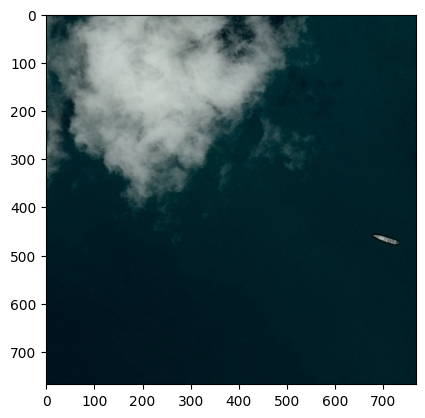

In [ ]:
ds = imread(os.path.join(train_dir, im_names[0]))
_ = plt.imshow(ds)


In [ ]:
ORIG_SIZE = 768


**Kreiranje modela**

In [ ]:
class ModelConfig(Config):

    NAME = 'Initial'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    BACKBONE = 'resnet50'

    NUM_CLASSES = 2

    IMAGE_MIN_DIM = 384
    IMAGE_MAX_DIM = 384
    #RPN_ANCHOR_SCALES = (8, 16, 32, 64)  #different window sizes in RPN achors
    TRAIN_ROIS_PER_IMAGE = 64
    MAX_GT_INSTANCES = 2
    DETECTION_MAX_INSTANCES = 15
    DETECTION_MIN_CONFIDENCE = 0.85
    DETECTION_NMS_THRESHOLD = 0.0
    RUN_EAGERLY = False

    STEPS_PER_EPOCH = 15 if debug else 5
    VALIDATION_STEPS = 10 if debug else 3

    LOSS_WEIGHTS = {
        "rpn_class_loss": 30.0,
        "rpn_bbox_loss": 0.8,
        "mrcnn_class_loss": 6.0,
        "mrcnn_bbox_loss": 1.0,
        "mrcnn_mask_loss": 1.2
    }

config = ModelConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        15
DETECTION_MIN_CONFIDENCE       0.85
DETECTION_NMS_THRESHOLD        0.0
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 30.0, 'rpn_bbox_loss': 0.8, 'mrcnn_class_loss': 6.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.2}
MASK_POOL_SIZE                 14
MASK_SHAPE             

In [ ]:
def rle_decode(mask_rle, shape=(768, 768)):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Klasa `LoadDataset` nasleđuje od `utils.Dataset` i implementira metode za učitavanje slika, maski i informacija o anotacijama kako bi se kreirao skup podataka za treniranje modela detekcije brodova na osnovu slika i njihovih RLE (Run-Length Encoding) anotacija.

In [ ]:
class LoadDataset(utils.Dataset):

    def __init__(self, im_names, image_annotations, orig_height, orig_width):
        super().__init__(self)

        self.add_class('ship', 1, 'Ship')

        for i, fp in enumerate(im_names):
            annotations = image_annotations.query('ImageId=="' + fp + '"')['EncodedPixels']
            self.add_image('ship', image_id=i, path=os.path.join(train_dir, fp),
                           annotations=annotations, orig_height=orig_height, orig_width=orig_width)

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        image = imread(fp)
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                mask[:, :, i] = rle_decode(a)
                class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)

Skup imena slika sa RLE anotacijama se podeljuje na trening i validacioni skup koristeći `train_test_split` funkciju, pri čemu se uzima u obzir veličina validacionog skupa definisana parametrima `config.VALIDATION_STEPS` i `config.IMAGES_PER_GPU`, a u slučaju debagovanja ograničava se na prvih 100 imena slika.

In [ ]:
from sklearn.model_selection import train_test_split
train_names1 = annotations[annotations.EncodedPixels.notnull()].ImageId.unique().tolist()  ## override with ships

test_size = config.VALIDATION_STEPS * config.IMAGES_PER_GPU
im_names_train, im_names_val = train_test_split(train_names1, test_size=test_size, random_state=42)

if debug:
    im_names_train = im_names_train[:100]
    im_names_val = im_names_val[:100]
    test_names1 = test_names1[:100]

print(len(im_names_train), len(im_names_val), len(test_names1))

6538 24 6882


Ova ćelija koda koristi IPython magiju `%%time` kako bi merila vreme izvršavanja bloka koda koji sledi. Zatim se kreira instanca klase `LoadDataset` sa imenima slika za trening (`im_names_train`), informacijama o anotacijama (`image_annotations`) i originalnom veličinom slika (`ORIG_SIZE`). Nakon toga, poziva se metoda `prepare()` na instanci kako bi se pripremio dataset za treniranje modela. Vreme izvršavanja se meri i prikazuje u rezultatima izvršavanja.

In [ ]:
%%time
dataset_train = LoadDataset(im_names_train, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

CPU times: user 21.4 s, sys: 312 ms, total: 21.7 s
Wall time: 22 s


In [ ]:
%%time
dataset_val = LoadDataset(im_names_val, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

CPU times: user 126 ms, sys: 1.64 ms, total: 128 ms
Wall time: 380 ms


Ovde se kreira instanca modela `MaskRCNN` iz biblioteke `modellib`, sa režimom rada postavljenim na 'training', konfiguracijom definisanom prethodno u klasi `ModelConfig` (instanciranoj kao `config`), i direktorijumom za čuvanje modela postavljenim na `main_dir`.

In [ ]:
model = modellib.MaskRCNN(mode='training', config=config, model_dir=main_dir)


Upozorena su isključena kako bi se sprečilo prikazivanje upozorenja tokom izvršavanja koda.

In [ ]:
LEARNING_RATE = 0.003

import warnings
warnings.filterwarnings("ignore")

Model se trenira koristeći `train` metodu.


In [ ]:
%%time
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE*2,
            epochs=2,
            layers='heads')

history = model.keras_model.history.history


Starting at epoch 0. LR=0.006

Checkpoint Path: /content/drive/MyDrive/initial20240121T1801/mask_rcnn_initial_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      

In [ ]:
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE,
            epochs=2,
            layers='all')

new_history = model.keras_model.history.history


Starting at epoch 2. LR=0.003

Checkpoint Path: /content/drive/MyDrive/initial20240121T1801/mask_rcnn_initial_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2

In [ ]:
history

{'loss': [271.5439758300781, 241.9595184326172],
 'rpn_class_loss': [250.712158203125, 229.7461395263672],
 'rpn_bbox_loss': [6.281377792358398, 5.814583778381348],
 'mrcnn_class_loss': [7.244105339050293, 1.6651203632354736],
 'mrcnn_bbox_loss': [6.733105659484863, 4.333428859710693],
 'mrcnn_mask_loss': [0.5732375383377075, 0.4002740979194641],
 'val_loss': [508.7471923828125, 139.67332458496094],
 'val_rpn_class_loss': [499.890380859375, 133.5048065185547],
 'val_rpn_bbox_loss': [4.156755447387695, 5.35447359085083],
 'val_mrcnn_class_loss': [5.193716788198799e-06, 0.10891785472631454],
 'val_mrcnn_bbox_loss': [4.43646764755249, 0.44709548354148865],
 'val_mrcnn_mask_loss': [0.263589471578598, 0.25802627205848694]}

Korišćenjem pickle biblioteke omogućeno je čuvanje istorije treninga modela koja kasnije može da se analizira ili koristi za ponovno učitavanje u drugim sesijama izvršavanja koda.

In [ ]:
import pickle


In [ ]:
with open('/content/drive/MyDrive/Ships_Detection/history.pkl', 'wb') as file:
    pickle.dump(history, file)

Ovde se koristi biblioteka pandas (`pd`) za kreiranje DataFrame objekta koji sadrži informacije iz istorije treninga modela (`history`) sa indeksima epoha i prikazuje gubitke i metrike.

In [ ]:
epochs = range(1, len(history['loss'])+1)
pd.DataFrame(history, index=epochs)

,loss,rpn_class_loss,rpn_bbox_loss,mrcnn_class_loss,mrcnn_bbox_loss,mrcnn_mask_loss,val_loss,val_rpn_class_loss,val_rpn_bbox_loss,val_mrcnn_class_loss,val_mrcnn_bbox_loss,val_mrcnn_mask_loss
1,271.543976,250.712158,6.281378,7.244105,6.733106,0.573238,508.747192,499.890381,4.156755,0.000005,4.436468,0.263589
2,241.959518,229.746140,5.814584,1.665120,4.333429,0.400274,139.673325,133.504807,5.354474,0.108918,0.447095,0.258026


Ovde se koristi biblioteka matplotlib (plt) za prikazivanje grafika gubitaka i metrika tokom treninga i validacije kroz različite epohe modela.

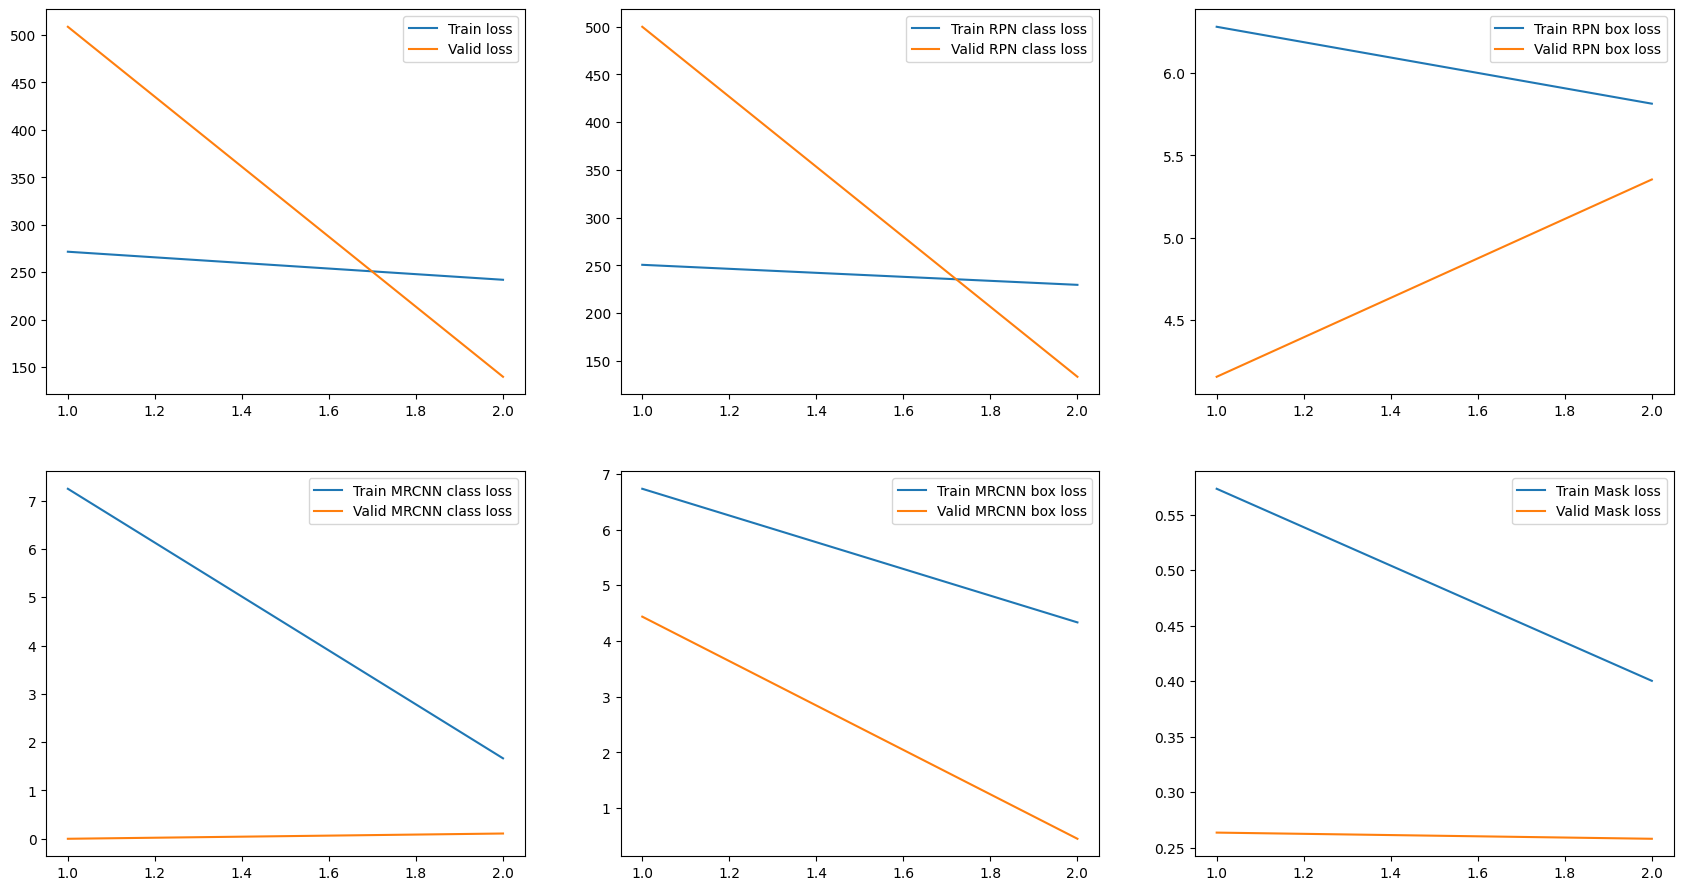

In [ ]:
plt.figure(figsize=(21,11))

plt.subplot(231)
plt.plot(epochs, history["loss"], label="Train loss")
plt.plot(epochs, history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(232)
plt.plot(epochs, history["rpn_class_loss"], label="Train RPN class loss")
plt.plot(epochs, history["val_rpn_class_loss"], label="Valid RPN class loss")
plt.legend()
plt.subplot(233)
plt.plot(epochs, history["rpn_bbox_loss"], label="Train RPN box loss")
plt.plot(epochs, history["val_rpn_bbox_loss"], label="Valid RPN box loss")
plt.legend()
plt.subplot(234)
plt.plot(epochs, history["mrcnn_class_loss"], label="Train MRCNN class loss")
plt.plot(epochs, history["val_mrcnn_class_loss"], label="Valid MRCNN class loss")
plt.legend()
plt.subplot(235)
plt.plot(epochs, history["mrcnn_bbox_loss"], label="Train MRCNN box loss")
plt.plot(epochs, history["val_mrcnn_bbox_loss"], label="Valid MRCNN box loss")
plt.legend()
plt.subplot(236)
plt.plot(epochs, history["mrcnn_mask_loss"], label="Train Mask loss")
plt.plot(epochs, history["val_mrcnn_mask_loss"], label="Valid Mask loss")
plt.legend()

plt.show()

Najbolja epoha (sa najmanjim validacionim gubitkom) i pripadajući gubitak su određeni pomoću Python funkcija np.argmin `history["val_loss"]`
, a rezultati su prikazani u ispisu.

In [ ]:
best_epoch = np.argmin(history["val_loss"])
score = history["val_loss"][best_epoch]
print(f'Best Epoch:{best_epoch+1} val_loss:{score}')

Best Epoch:2 val_loss:139.67332458496094


In [ ]:
model_path ="/content/drive/MyDrive/initial20240121T1801/mask_rcnn_initial_0001.h5"


Instanca modela `MaskRCNN` se kreira u režimu *inference* koristeći konfiguraciju `InferenceConfig`, a težine modela se učitavaju iz prethodno treniranog modela.

In [ ]:
class InferenceConfig(ModelConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

model = modellib.MaskRCNN(mode='inference',
                          config=inference_config,
                          model_dir=main_dir)

print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/MyDrive/initial20240121T1801/mask_rcnn_initial_0001.h5
Re-starting from epoch 1


Ova funkcija get_colors_for_class_ids dodeljuje određenu boju (.941, .204, .204) za svaki identifikator klase iz liste `class_ids`.

In [ ]:
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
    return colors

Prikazivanje nekoliko primera poređenja između stvarnih oznaka i predikcija na validacionom skupu podataka:

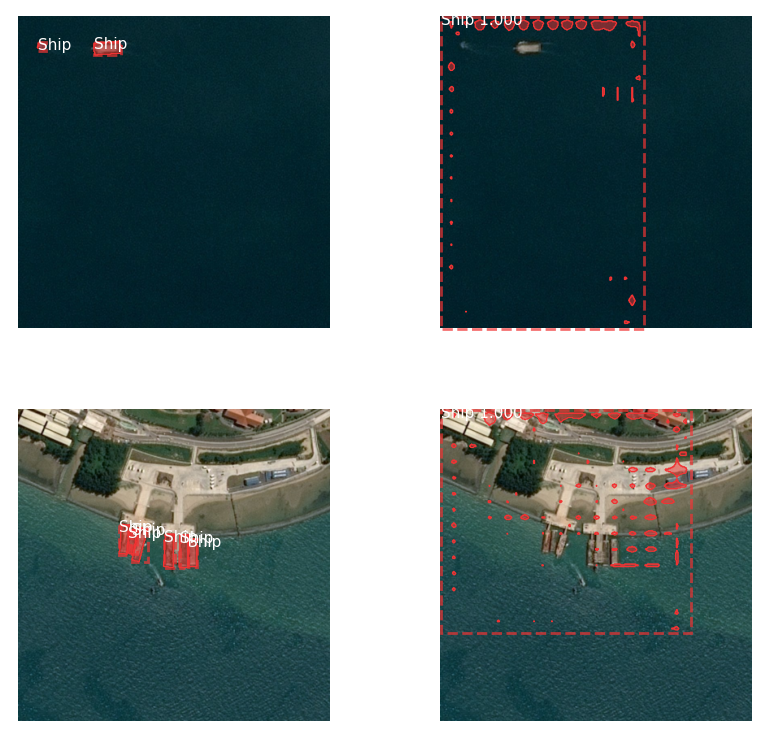

In [ ]:
dataset = dataset_val
fig = plt.figure(figsize=(10, 40))

for i in range(4,6,1):

    image_id = random.choice(dataset.image_ids)

    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)

    plt.subplot(8, 2, 2*i + 1)
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                                dataset.class_names,
                                colors=get_colors_for_class_ids(gt_class_id), ax=fig.axes[-1])

    plt.subplot(8, 2, 2*i + 2)
    results = model.detect([original_image])
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                                dataset.class_names, r['scores'],
                                colors=get_colors_for_class_ids(r['class_ids']), ax=fig.axes[-1])

**Metrike modela**

Ispod prikazana funkcija se koristi za evaluaciju performansi modela na validacionom skupu podataka i pruža informacije o preciznosti (AP) po klasi, srednjoj preciznosti po svim klasama (mAP), preseku nad unijom (IoU) po slici, srednjoj vrednosti IoU (isključujući NaN vrednosti), i Kaggle F2 oceni po slici i srednjoj vrednosti Kaggle F2 ocene.

In [ ]:
import numpy as np

# Define a function to calculate AP, mAP, IoU, and Kaggle F2 score
def calculate_ap_map_iou_f2(model, dataset, inference_config):
    APs = []
    IoUs = []
    F2s = []
    gt_bbox_list = []
    gt_class_id_list = []
    gt_mask_list = []
    pred_bbox_list = []
    pred_class_id_list = []
    pred_score_list = []

    # Loop through the dataset
    for image_id in dataset.image_ids:
        original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
            modellib.load_image_gt(dataset, inference_config, image_id, use_mini_mask=False)

        # Append ground truth annotations to lists
        gt_bbox_list.append(gt_bbox)
        gt_class_id_list.append(gt_class_id)
        gt_mask_list.append(gt_mask)

        # Run inference on the image
        results = model.detect([original_image])
        r = results[0]

        # Append predicted results to lists
        pred_bbox = r['rois']
        pred_class_ids = r['class_ids']
        pred_scores = r['scores']
        pred_masks = r['masks']
        pred_bbox_list.append(pred_bbox)
        pred_class_id_list.append(pred_class_ids)
        pred_score_list.append(pred_scores)

        # Compute AP and IoU for the image
        AP, _, _, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, pred_bbox, pred_class_ids, pred_scores, pred_masks, iou_threshold=0.5)  # Use IoU threshold of 0.5 for competition evaluation
        APs.append(AP)

        # Calculate IoU
        valid_overlaps = overlaps[~np.isnan(overlaps)]  # Exclude NaN IoU values
        if len(valid_overlaps) > 0:
            IoU = np.mean(valid_overlaps)
            IoUs.append(IoU)

        # Calculate Kaggle F2 score
        TP = len(overlaps) - np.isnan(overlaps).sum()  # True Positives (excluding NaN IoU values)
        FN = len(gt_bbox) - TP  # False Negatives
        FP = len(pred_bbox) - TP  # False Positives
        beta = 2  # F2 score weight for recall (increase weight of recall)
        F2 = ((1 + beta*2) * TP) / ((1 + beta*2) * TP + beta*2 * FN + FP)  # Modified Kaggle F2 score formula
        F2s.append(F2)

    # Calculate mean Average Precision (mAP), mean IoU (excluding NaN values), and mean Kaggle F2 score
    mAP = np.mean(APs)
    mean_IoU = np.nanmean(IoUs) if len(IoUs) > 0 else np.nan
    mean_F2 = np.mean(F2s)

    return APs, mAP, IoUs, mean_IoU, F2s, mean_F2

# Call the function to calculate AP, mAP, IoU, and Kaggle F2 score
APs, mAP, IoUs, mean_IoU, F2s, mean_F2 = calculate_ap_map_iou_f2(model, dataset_val, inference_config)

# Print the results
print("Average Precision (AP) per class:")
for i, AP in enumerate(APs):
    print(f"Class {i}: AP = {AP}")

print("Mean Average Precision (mAP):", mAP)

print("Intersection over Union (IoU) per image:")
for i, IoU in enumerate(IoUs):
    print(f"Image {i}: IoU = {IoU}")

print("Mean IoU (excluding NaN values):", mean_IoU)

print("Kaggle F2 score per image:")
for i, F2 in enumerate(F2s):
    print(f"Image {i}: F2 score = {F2}")

print("Mean Kaggle F2 score:", mean_F2)

Average Precision (AP) per class:
Class 0: AP = 0.0
Class 1: AP = 0.0
Class 2: AP = 0.0
Class 3: AP = 0.0
Class 4: AP = 0.0
Class 5: AP = 0.0
Class 6: AP = 0.0
Class 7: AP = 0.0
Class 8: AP = 0.0
Class 9: AP = 0.0
Class 10: AP = 0.0
Class 11: AP = 0.0
Class 12: AP = 0.0
Class 13: AP = 0.0
Class 14: AP = 0.0
Class 15: AP = 0.0
Class 16: AP = 0.0
Class 17: AP = 0.0
Class 18: AP = 0.0
Class 19: AP = 0.0
Class 20: AP = 0.0
Class 21: AP = 0.0
Class 22: AP = 0.0
Class 23: AP = 0.0
Mean Average Precision (mAP): 0.0
Intersection over Union (IoU) per image:
Image 0: IoU = 0.021936459466814995
Image 1: IoU = 0.0
Image 2: IoU = 0.0010278214467689395
Image 3: IoU = 0.0
Image 4: IoU = 0.0
Image 5: IoU = 0.0
Image 6: IoU = 0.0
Image 7: IoU = 0.0021648965775966644
Image 8: IoU = 0.002107764594256878
Image 9: IoU = 0.0
Image 10: IoU = 0.0
Image 11: IoU = 0.0
Image 12: IoU = 0.0
Image 13: IoU = 0.0
Image 14: IoU = 0.0
Image 15: IoU = 0.0
Image 16: IoU = 0.002352941082790494
Image 17: IoU = 0.0072398190

**Zaključak**

Na samom kraju, možemo istaći da je Mask R-CNN pokazao svoju izuzetnu moć i popularnost kao algoritam za detekciju objekata, efikasno kombinujući prednosti detekcije objekata i segmentacije. Njegova sposobnost generisanja preciznih maski piksela za svaki detektovani objekat ga čini posebno korisnim u raznovrsnim aplikacijama zasnovanim na računarskoj viziji.

U poređenju s drugim algoritmima za detekciju objekata, Mask R-CNN se izdvaja po svojoj sposobnosti pružanja detaljnih informacija i preciznih rezultata. Nasuprot starijim modelima poput RCNN-a, Mask R-CNN donosi poboljšanja u detekciji i razumevanju rezultata. U odnosu na Fast-RCNN, koji generiše samo okvire, Mask R-CNN pruža detaljnije informacije, dok u odnosu na YOLO i SSD, koji takođe koriste okvire, Mask R-CNN se ističe sposobnošću prepoznavanja finih detalja kroz generisanje maski.

Ovaj rad je sproveo implementaciju i treniranje Mask R-CNN modela za detekciju brodova na datom dataset-u. Primena transfer učenja i korišćenje prethodno obučenog modela, doprinela je efikasnom treniranju na dataset-u za detekciju brodova. Vizualizacije rezultata detekcije pružile su uvid u preciznost lokalizacije i klasifikacije objekata, dok je analiza performansi kroz različite metrike poput AP, mAP, IoU i Kaggle F2 ocene pružila sveobuhvatan uvid u efikasnost modela.

Implementirane funkcionalnosti omogućavaju dalje istraživanje i prilagođavanje ovog modela za slične zadatke detekcije objekata u različitim domenima.


**Reference**